<a href="https://colab.research.google.com/github/antfolk/BMEN35_2023/blob/main/Session7/BMEN35_cinc2017_assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7
## Fill in your name below
-- <font color = Green> Mosa Hosseini </font>

## Your mission is now the following:

You will use data from the Computing in Cardiology challenge 2017 (as was explained in the lectures) (https://physionet.org/content/challenge-2017/1.0.0/). **Take your time to read the page**. The training set contains data from more that 8000 recordings. There are four classes / labels in the datasets (Normal, AF (Atrial Fibrillation), Other rhytm, Noisy). The validation contains data from 300 recordings.

**You will download a zip-file from the Canvas-page for the assignment**. The zip-file contains six files:

*   cinc2017_features_training.csv
*   cinc2017_features_validation.csv
*   cinc2017_raw_train.csv **(Very large file)**
*   cinc2017_raw_validation.csv
*   cinc2017_labels_train.csv
*   cinc2017_labels_validation.csv
*   andreotti_et_al.h5

You can choose to make a model based on "features" and or a deep learning model based on the "raw" data. There is a premade/pretrained model that you can load and look at for inspiration (andreotti_et_al.h5). It is rather large. Perhaps you can get similar scores with a simpler model.

You can find more information on the features and the model (andreotti_et_al.h5) in this paper https://www.cinc.org/archives/2017/pdf/360-239.pdf

You also need to implement the scoring according to the webpage. The final score is the **average f1 score**. For this you might want to check out the classification_report and confusion_matrix in sklearn.

For this assignment there is more data than in the other. If you choose to go for a deep learning model, be prepared for longer training times.

If you look through the other notebooks, you will find how to load csv files and all other things you need for this assignment.

You can have a look at the leaderboard on the webpage to see what scores the contestants where able to get.

Try atleast three models and see what scores you can get with each model. If you perform some hyperparameter optimization, make sure you don't use the validation set for this. The validation set is for getting the final scores only.

You will start by importing some of the usual suspects. You know what to do know.

In [1]:
import csv
import numpy as np
def open_csv_file(file_name):
    rows = []
    with open(file_name, 'r') as file:
        csvreader = csv.reader(file)
        header = next(csvreader)
        for row in csvreader:
            rows.append(row)
    return np.array(rows)


In [18]:
X_train= open_csv_file("cinc2017_features_training.csv")
y_train = open_csv_file("cinc2017_labels_training.csv")
X_val = open_csv_file("cinc2017_features_validation.csv").astype(int)
y_val = open_csv_file("cinc2017_labels_validation.csv").astype(int)


ValueError: invalid literal for int() with base 10: '0.425575'

In [13]:
X_train.shape

(8527, 2704)

In [14]:
X_val.shape

(299, 2704)

In [5]:
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
def get_freq(y):
    plt.figure
    labels =['Normal', 'AF' , 'Other rhytm', 'Noisylabels' ]
    frequency_dict = {}
    for i,label in enumerate(labels):
        frequency_dict[label] = sum(y==i)
    
    plt.bar(list(frequency_dict.keys()) , list(frequency_dict.values()))
    plt.show()

## Examine the number of samples in the training set

array(['1', '1', '0', ..., '1', '1', '1'], dtype='<U1')

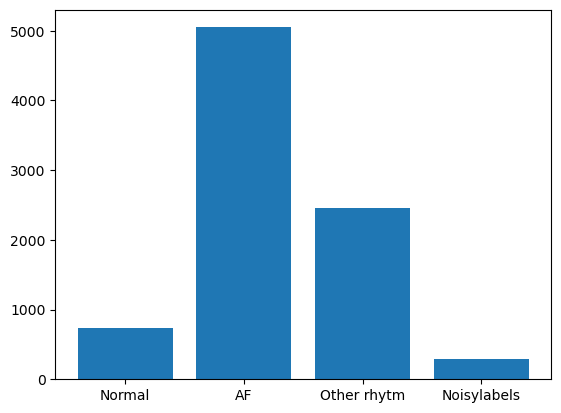

In [10]:
d = get_freq(y_train[:,0] )

## Normal and noisy labels have not so many samples in training data

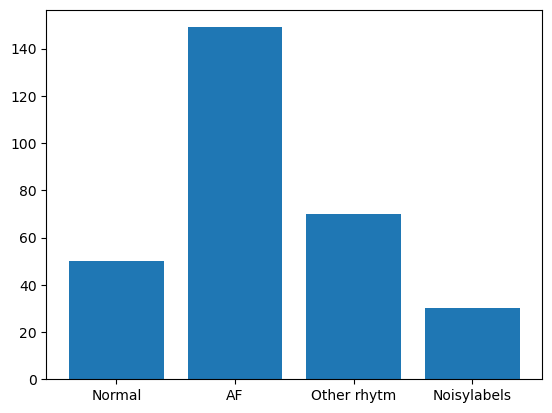

In [11]:
d = get_freq(y_val[:,0] )

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow

## Examin wether scaling is needed or not. 

In [101]:
#mean zero ? yes
print("mean of features of each sample ",np.mean(X_train, axis=1) )
print("----------------------------------------------------------------")
print("variance of features of each sample" ,np.var( X_train, axis=1) )

mean of features of each sample  [ 0.08120906 -0.04626346  0.04546653 ... -0.06333596 -0.02410482
 -0.04219028]
----------------------------------------------------------------
variance of features of each sample [0.60940003 0.14398925 0.28014836 ... 0.12947719 0.2156689  0.17062424]


In [122]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout,GRU
from tensorflow.keras.layers import LSTM , Input


In [127]:
from tensorflow.keras.utils import to_categorical
y_train= to_categorical(y_train)
y_val = to_categorical(y_val)

# Deep model

In [176]:
# create and fit the LSTM network
input_shape = X_train.shape[1]
model = Sequential()
#model.add(LSTM(32, input_shape=input_shape ,return_sequences=True) )
model.add(Input(shape = (input_shape,)))
#model.add(Dense(input_shape, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(264, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy' , optimizer=optim , metrics=["accuracy"])
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
model.fit(X_train, y_train,validation_data=(X_val,y_val),  epochs=100, batch_size=124, verbose=1 , callbacks = [callback])

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 1024)              2769920   
                                                                 
 dropout_30 (Dropout)        (None, 1024)              0         
                                                                 
 dense_98 (Dense)            (None, 512)               524800    
                                                                 
 dropout_31 (Dropout)        (None, 512)               0         
                                                                 
 dense_99 (Dense)            (None, 264)               135432    
                                                                 
 dropout_32 (Dropout)        (None, 264)               0         
                                                                 
 dense_100 (Dense)           (None, 128)             

# Lstm 

In [155]:
X_trin_mat = X_train.reshape([len(X_train) , 52,52])
X_val_mat = X_val.reshape([len(X_val), 52,52])
inputs = tf.keras.Input(shape=(52,52))
X = tf.keras.layers.LSTM(52,return_sequences=True)(inputs)
X = tf.keras.layers.Flatten()(X)
X = tf.keras.layers.Dropout(0.2)(X)
X = tf.keras.layers.Dense(264, activation=tf.nn.relu)(X)
X = tf.keras.layers.Dropout(0.1)(X)
X = tf.keras.layers.Dense(124, activation=tf.nn.relu)(X)
X = tf.keras.layers.Dropout(0.1)(X)
X = tf.keras.layers.Dense(64, activation=tf.nn.relu)(X)
outputs = tf.keras.layers.Dense(4, activation=tf.nn.softmax)(X)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 52, 52)]          0         
                                                                 
 lstm_10 (LSTM)              (None, 52, 52)            21840     
                                                                 
 flatten_1 (Flatten)         (None, 2704)              0         
                                                                 
 dropout_27 (Dropout)        (None, 2704)              0         
                                                                 
 dense_93 (Dense)            (None, 264)               714120    
                                                                 
 dropout_28 (Dropout)        (None, 264)               0         
                                                                 
 dense_94 (Dense)            (None, 124)               3286

In [179]:
from sklearn.metrics import confusion_matrix, classification_report
y_val_hatt = model.predict(X_val)
y_val_hatt = y_val_hatt.argmax(axis=1)
print(classification_report(y_val.argmax(axis = 1),y_val_hatt))

10/10 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.96      0.52      0.68        50
           1       0.81      0.97      0.88       149
           2       0.77      0.69      0.73        70
           3       0.74      0.77      0.75        30

    accuracy                           0.81       299
   macro avg       0.82      0.74      0.76       299
weighted avg       0.82      0.81      0.80       299



In [173]:
from sklearn.metrics import confusion_matrix, classification_report
y_val_hatt = model.predict(X_val_mat)

y_val_hatt = y_val_hatt.argmax(axis=1)

10/10 [==============================] - 0s 18ms/step


In [175]:
print(classification_report(y_val.argmax(axis = 1),y_val_hatt))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        50
           1       0.88      0.96      0.92       149
           2       0.88      0.83      0.85        70
           3       0.82      0.90      0.86        30

    accuracy                           0.89       299
   macro avg       0.89      0.86      0.87       299
weighted avg       0.89      0.89      0.89       299



# Compare to the pretrained model

In [187]:
new_model = tf.keras.models.load_model('andreotti_et_al.h5')

# Show the model architecture
#new_model.summary()

In [ ]:
from 

# Create a new model instance
model = create_model()

# Load the previously saved weights
model.load_weights(latest)

# Re-evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

In [185]:
X= open_csv_file("cinc2017_raw_train.csv")
# y = open_csv_file("cinc2017_labels_training.csv")
X_vall = open_csv_file("cinc2017_raw_validation.csv")
# y_vall = open_csv_file("cinc2017_labels_validation.csv")


In [186]:
print(X.shape)
print(X_vall.shape)


(8527, 18000)
(299, 18000)


In [188]:
y_vall_hatt = new_model.predict(X_vall)

y_vall_hatt = y_vall_hatt.argmax(axis = 1)

10/10 [==============================] - 16s 1s/step


In [192]:
print(classification_report(y_val.argmax(axis = 1) , y_vall_hatt) )

              precision    recall  f1-score   support

           0       0.95      0.72      0.82        50
           1       0.93      0.95      0.94       149
           2       0.85      0.87      0.86        70
           3       0.76      0.93      0.84        30

    accuracy                           0.89       299
   macro avg       0.87      0.87      0.86       299
weighted avg       0.90      0.89      0.89       299



## In conclusion , our LSTM based model gives a higher f1 score than the pretrained model. But it can also be due to randomness .

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = SVC(kernel="rbf")

clf.fit(X_train, y_train.astype(int))

C:\Users\sasyn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [26]:
y = clf.predict(X_val)

In [28]:
print(classification_report(y_val.astype(int) , y))

              precision    recall  f1-score   support

           0       0.97      0.72      0.83        50
           1       0.82      0.95      0.88       149
           2       0.61      0.66      0.63        70
           3       0.85      0.37      0.51        30

    accuracy                           0.79       299
   macro avg       0.81      0.67      0.71       299
weighted avg       0.80      0.79      0.78       299

